<a href="https://colab.research.google.com/github/Alka-vish/Machine-Learning-Lab/blob/main/Exp_3_Linear_Regression_L1_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/concrete_data.csv")

In [ ]:
print(df.head())


   cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   coarse_aggregate  fine_aggregate   age  concrete_compressive_strength  
0            1040.0            676.0   28                          79.99  
1            1055.0            676.0   28                          61.89  
2             932.0            594.0  270                          40.27  
3             932.0            594.0  365                          41.05  
4             978.4            825.5  360                          44.30  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split features and target
X = df.drop(columns=['concrete_compressive_strength'])
y = df['concrete_compressive_strength']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to print metrics
def evaluate_model(name, model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"\n{name}:")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
    print(f"Train R2:   {r2_score(y_train, y_train_pred):.4f}")
    print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
    print(f"Test R2:    {r2_score(y_test, y_test_pred):.4f}")

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
evaluate_model("Linear Regression", lr)



Linear Regression:
Train RMSE: 10.5188
Train R2:   0.6105
Test RMSE:  9.7965
Test R2:    0.6276


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/winequality-red.csv")

In [ ]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# 1. Split features and target
X = df1.drop(columns=['quality'])
y = df1['quality']

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature scaling (important for Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Lasso Regression with Cross-Validation to find best alpha
lasso_cv = LassoCV(cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

# 5. Predict and evaluate
y_train_pred = lasso_cv.predict(X_train_scaled)
y_test_pred = lasso_cv.predict(X_test_scaled)

print("Best alpha found by LassoCV:", lasso_cv.alpha_)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Train R2:   {r2_score(y_train, y_train_pred):.4f}")

print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Test R2:    {r2_score(y_test, y_test_pred):.4f}")

# 6. Optional: Show coefficients (which features Lasso shrank to zero)
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': lasso_cv.coef_
})
print("\nLasso coefficients:")
print(coef_df)


Best alpha found by LassoCV: 0.008807542001740857
Train RMSE: 0.6522
Train R2:   0.3462
Test RMSE:  0.6267
Test R2:    0.3990

Lasso coefficients:
                 feature  coefficient
0          fixed acidity     0.009773
1       volatile acidity    -0.171228
2            citric acid    -0.000000
3         residual sugar     0.000000
4              chlorides    -0.079612
5    free sulfur dioxide     0.034800
6   total sulfur dioxide    -0.099212
7                density    -0.000000
8                     pH    -0.051184
9              sulphates     0.132807
10               alcohol     0.298581


In [ ]:
# Predict on test data
y_test_pred = lasso_cv.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values
comparison_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality': y_test_pred
})

# Show first 20 rows
print(comparison_df.head(10))

      Actual Quality  Predicted Quality
803                6           5.338324
124                5           5.087579
350                6           5.623131
682                5           5.456651
1326               6           5.725815
976                5           5.291640
1493               5           5.092331
706                5           5.141628
613                5           5.742689
1587               6           5.690810


In [ ]:
new_input = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.7],
    'citric acid': [0.0],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11.0],
    'total sulfur dioxide': [34.0],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [9.4]
})

In [ ]:
new_input_scaled = scaler.transform(new_input)


In [ ]:
predicted_quality = lasso_cv.predict(new_input_scaled)
print(f"Predicted wine quality: {predicted_quality[0]:.3f}")


Predicted wine quality: 5.068


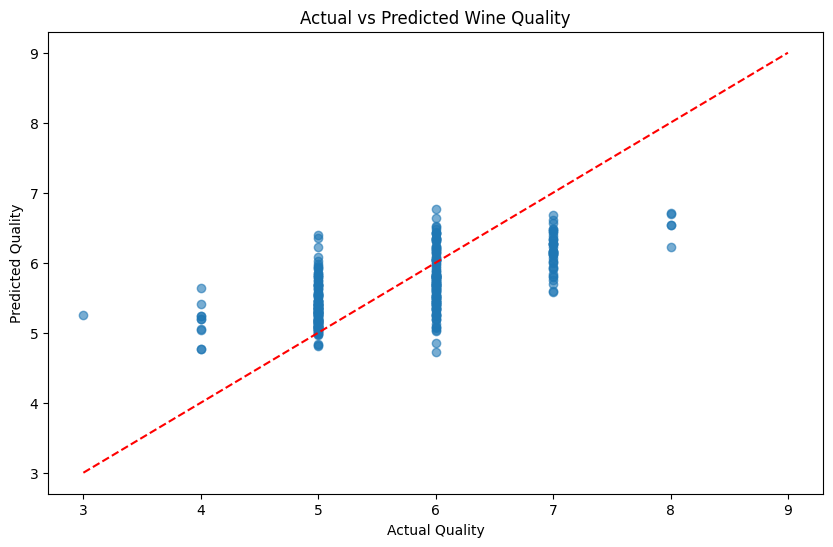

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([3,9], [3,9], color='red', linestyle='--')  # perfect prediction line
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality")
plt.show()


In [ ]:
df2=pd.read_csv("/content/drive/MyDrive/HousingData.csv")

In [ ]:
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming your DataFrame is 'df' and target is 'MEDV'
# If there are missing values (like in row 4), drop or fill them
df2 = df2.dropna()

# Split features and target
X = df2.drop(columns=['MEDV'])
y = df2['MEDV']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge regression with built-in cross-validation to find best alpha
alphas = np.logspace(-3, 3, 100)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

# Predict
y_train_pred = ridge_cv.predict(X_train_scaled)
y_test_pred = ridge_cv.predict(X_test_scaled)

print("Best alpha found by RidgeCV:", ridge_cv.alpha_)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}")
print(f"Train R2:   {r2_score(y_train, y_train_pred):.4f}")

print(f"Test RMSE:  {np.sqrt(mean_squared_error(y_test, y_test_pred)):.4f}")
print(f"Test R2:    {r2_score(y_test, y_test_pred):.4f}")

# Show coefficients
coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': ridge_cv.coef_
})
print("\nRidge coefficients:")
print(coef_df)


Best alpha found by RidgeCV: 15.199110829529332
Train RMSE: 4.1153
Train R2:   0.7946
Test RMSE:  5.7109
Test R2:    0.6133

Ridge coefficients:
    feature  coefficient
0      CRIM    -0.949303
1        ZN     0.758897
2     INDUS    -0.191991
3      CHAS     0.571559
4       NOX    -1.474282
5        RM     3.025881
6       AGE    -0.564879
7       DIS    -2.350734
8       RAD     1.129512
9       TAX    -1.218713
10  PTRATIO    -1.969051
11        B     0.863356
12    LSTAT    -2.809523


In [ ]:

# Create a DataFrame comparing actual and predicted MEDV values
comparison_df = pd.DataFrame({
    'Actual MEDV': y_test,
    'Predicted MEDV': y_test_pred
})

# Reset index to have clean row numbers (optional)
comparison_df = comparison_df.reset_index(drop=True)

# Show first 20 rows
print(comparison_df.head(10))


   Actual MEDV  Predicted MEDV
0         25.0       28.046870
1         18.6       19.234866
2         21.0       21.962496
3         23.5       30.177247
4         17.5       18.690427
5         33.8       34.348505
6         19.7       22.195998
7         24.8       30.972379
8         32.0       33.127880
9         14.0       15.091432


In [ ]:
# Example input row for prediction
sample_input = [[
    0.045,    # CRIM: low crime rate
    12.5,     # ZN: % land zoned for large lots
    5.13,     # INDUS: non-retail business acres
    0,        # CHAS: not near Charles River
    0.437,    # NOX: low air pollution
    6.78,     # RM: average rooms per dwelling
    54.3,     # AGE: % houses built before 1940
    5.1,      # DIS: weighted distance to employment centers
    4,        # RAD: highway accessibility index
    307,      # TAX: property tax per $10,000
    17.4,     # PTRATIO: pupil-teacher ratio
    392.8,    # B: proportion of Black residents calculation
    6.5       # LSTAT: % lower status of the population
]]


In [ ]:
predicted_price = ridge_cv.predict(sample_input)
print(predicted_price)


[-75.36252894]
